In [25]:
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
import sklearn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

PCA
--------

Full proof from [My Github](https://davidkwon91.github.io/categories/ML/Principal-Components-Analysis/)

In [4]:
iris = datasets.load_iris()
iris

X = iris.data[:,:2]
y = iris.target

#Centering X
X_center = X - np.mean(X, axis=0)
X_center.shape

(150, 2)

$$S_{2 x 2} = \frac{1}{n-1}X_{2 x 150}^{T} X_{150x2}$$

In [40]:
#Convariance
S = np.matmul(np.transpose(X_center), X_center)/(len(X_center)-1)
S

array([[ 0.68569351, -0.042434  ],
       [-0.042434  ,  0.18997942]])

## Eigenvector

$$det(S - \lambda I) = 0$$

In [41]:
#Eigenvector
eig_w,eig_v = np.linalg.eig(S)
eig_w, eig_v

(array([0.6892997 , 0.18637323]),
 array([[ 0.99640834,  0.08467831],
        [-0.08467831,  0.99640834]]))

##  SVD
$$A_{m x n} = U_{m x m} \Sigma_{m x n} V_{n x m}^{T}$$


$$S = X^{T}X = (U\Sigma V^{T})^{T}(U \Sigma V^{T}) \\ = (V\Sigma^{T}U^{T})(U \Sigma V^{T}) \\ = V(\Sigma^{T}\Sigma)V^{T}$$


In [39]:
#Singular Value Decomposition
svd_u, svd_s, svd_v = sklearn.utils.extmath.randomized_svd(S, 2, flip_sign = False)

np.transpose(svd_v), svd_s

(array([[ 0.99640834,  0.08467831],
        [-0.08467831,  0.99640834]]),
 array([0.6892997 , 0.18637323]))

## PCA

Let $Y$ becomes linear transformation of X by P, it will be PCA

$$Y_{2x2} = X_{150x2}P_{2x2}$$
$$S_{Y} = Y^{T}Y \\ = (XP)^{T}(XP) \\ = (P^{T}X^{T}XP) \\ = P^{T}S_{X}P \\ = P^{T}(\Sigma^{T}\Sigma)P \\ = V(\Sigma^{T}\Sigma)V^{T}$$

$S_{Y}$ is a symmetric matrix because it's the covariance matrix of $Y$

$$S_{Y} = S_{Y}^{T}$$

Let assume that $P$ is eigen matrix of $S_{X}$

and $S_{Y} = P^{-1}S_{X}P$ by definition of EigenDecomposition

Then,

$$S_{Y}^{T} = (P^{-1}S_{X}P)^{T} \\ = P^{T}S_{X}^{T}(P^{-1})^{T}$$

From above,

$$S_{Y} = S_{Y}^{T}$$

$$P^{T}S_{X}P = P^{T}S_{X}^{T}(P^{-1})^{T}$$


$$\because S_{X} = S_{X}^{T} \\ \therefore (P^{-1})^{T} = P$$

Therefore, $P$ is orthonormal matrix, and it will become our PCA components

Here, P is eigen matrix of covariance matrix of X and $P = V^{T}$ from SVD

In [8]:
#PCA from eignvector of covariance of X
np.allclose(PCA().fit_transform(X_center),np.matmul(X_center, eig_v))

True

In [9]:
#PCA from SVD of covariance of X
np.allclose(PCA().fit_transform(X_center),np.matmul(X_center, np.transpose(svd_v)))

True

([], <a list of 0 Text major ticklabel objects>)

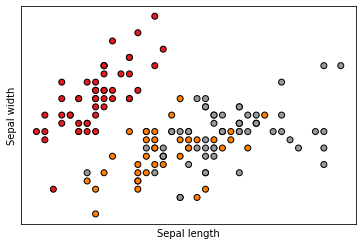

In [34]:
#Original

plt.scatter(X_center[:, 0], X_center[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xticks(())
plt.yticks(())

([], <a list of 0 Text major ticklabel objects>)

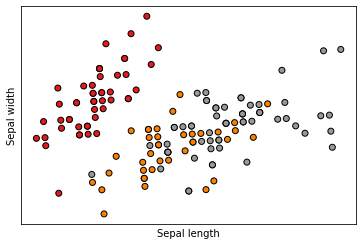

In [36]:
#Rotated

plt.scatter(np.matmul(X_center, eig_v)[:, 0], np.matmul(X_center, eig_v)[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xticks(())
plt.yticks(())

## PCA Whitening

$$X_{PCA Whitening} = (diag(S_{X})^{-\frac{1}{2}}XV^{T}$$

Here, $diag(S_{X})$ will be the eigen vector of $S_{X}$ 

([], <a list of 0 Text major ticklabel objects>)

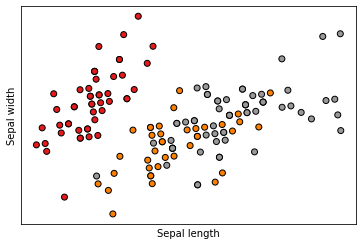

In [37]:
#Rotated PCA Whitening

plt.scatter(np.matmul(np.matmul(X_center, eig_v),eig_v/np.sqrt(eig_w))[:, 0], 
            np.matmul(np.matmul(X_center, eig_v),eig_v/np.sqrt(eig_w))[:, 1], 
            c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xticks(())
plt.yticks(())

## ZCA Whitening

$$X_{PCA Whitening} = (diag(S_{X})^{-\frac{1}{2}} VXV^{T}$$

([], <a list of 0 Text major ticklabel objects>)

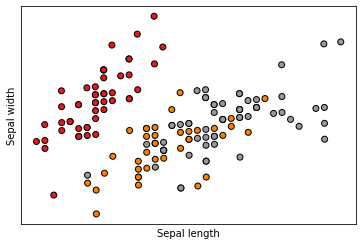

In [46]:
#Rotated PCA Whitening

plt.scatter(np.matmul(np.matmul(np.matmul(X_center, eig_v),eig_v/np.sqrt(eig_w)),np.transpose(eig_v))[:, 0], 
            np.matmul(np.matmul(np.matmul(X_center, eig_v),eig_v/np.sqrt(eig_w)),np.transpose(eig_v))[:, 1], 
            c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xticks(())
plt.yticks(())